In [1]:
#Import Necessary Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from kerastuner.tuners import RandomSearch

2024-05-05 21:45:09.441718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 21:45:09.441859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 21:45:09.702267: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_24/2222265450.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
#for normal people

normal_cells=os.listdir('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no')
print(normal_cells[0:5])
print(normal_cells[-5:])

['34 no.jpg', 'N20.JPG', 'N1.JPG', '49 no.jpg', 'N15.jpg']
['1 no.jpeg', '2 no.jpeg', '35 no.jpg', 'N6.jpg', '33 no.jpg']


In [3]:
#for tumor illness

tumor_cells=os.listdir('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes')
print(tumor_cells[0:5])
print(tumor_cells[-5:])

['Y115.JPG', 'Y192.JPG', 'Y162.jpg', 'Y9.jpg', 'Y108.jpg']
['Y113.JPG', 'Y101.jpg', 'Y89.JPG', 'Y44.JPG', 'Y92.png']


In [4]:
#Length of the images from both of the files

print('Length of the Normal Brain Cells: ',len(normal_cells))
print('Length of the Cancurus Brain Cells: ',len(tumor_cells))

Length of the Normal Brain Cells:  98
Length of the Cancurus Brain Cells:  155


In [5]:
#Creating the Labels 0 --> Normal Cell 1 --> Tumor Cell

normal_label=[0]*98
tumor_label=[1]*155
print('Normal Cell labels: ',len(normal_label))
print('Tumor Cell labels: ',len(tumor_label))
print('With Normal labels: ',normal_label[0:5])
print('With Tumor labels: ',tumor_label[0:5])

Normal Cell labels:  98
Tumor Cell labels:  155
With Normal labels:  [0, 0, 0, 0, 0]
With Tumor labels:  [1, 1, 1, 1, 1]


In [6]:
#Combining both labels into a single column
labels=normal_label+tumor_label
print('Total labels are: ',len(labels))
print(labels[0:5])
print(labels[-5:])

Total labels are:  253
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [7]:
type(labels)

list

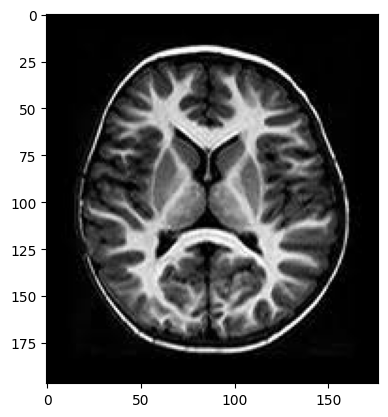

In [8]:
#Normal Cell 
nor_img=mpimg.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/14 no.jpg')
plt.imshow(nor_img)

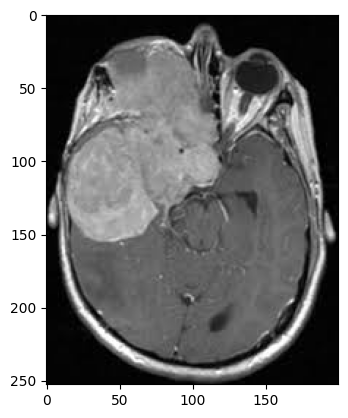

In [9]:
#trumer cell imeage 
nor_img=mpimg.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y106.jpg')
plt.imshow(nor_img)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

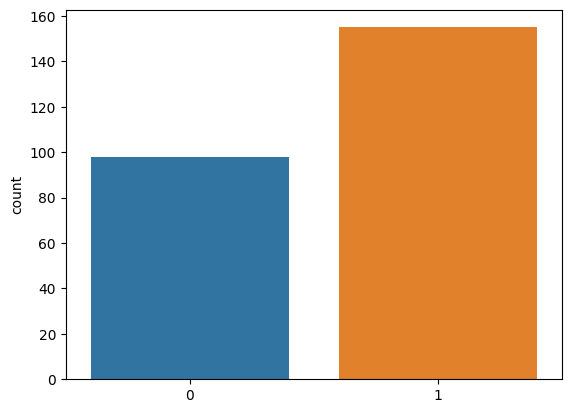

In [10]:
#Distribution of the Labeled column 
import seaborn as sn
sn.countplot(x=labels)

In [11]:
#Image Preprocessing Steps 
normal_path=('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/')
data=[]

for img_file in normal_cells:
    image=Image.open(normal_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    
tumor_path=('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/')

for img_file in tumor_cells:
    image=Image.open(tumor_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
type(data)

list

In [12]:
#total length of the data
len(data)

253

In [13]:
#Checking the first image 
data[0]

array([[[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)

In [14]:
type(data[0])

numpy.ndarray

In [15]:
#Checking the shape of the single image
data[0].shape

(128, 128, 3)

In [16]:
#Converting data and labels into numpy array
X=np.array(data)
Y=np.array(labels)
type(X)
type(Y)

numpy.ndarray

In [17]:
print(X.shape)
print(Y.shape)

(253, 128, 128, 3)
(253,)


In [18]:
#Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)
print(X.shape,X_train.shape,X_test.shape)

(253, 128, 128, 3) (202, 128, 128, 3) (51, 128, 128, 3)


In [19]:
#Scaling the data
X_train=X_train/255
X_test=X_test/255
X_train[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmenter = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [21]:
import cv2

def enhance_image(image):
    # Convert to YUV color space
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    
    # Apply histogram equalization
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    
    # Convert back to RGB
    image_enhanced = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return image_enhanced

In [22]:
# Model Building 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout
num_of_classes=2

model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_of_classes, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history=model.fit(X_train,Y_train, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5182 - loss: 3.2252

I0000 00:00:1714945537.863102      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714945537.880535      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 643ms/step - accuracy: 0.5375 - loss: 3.1242 - val_accuracy: 0.5714 - val_loss: 2.1150
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7417 - loss: 1.0522 - val_accuracy: 0.8095 - val_loss: 0.4714
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7754 - loss: 0.5069 - val_accuracy: 0.7619 - val_loss: 0.8180
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9034 - loss: 0.2838 - val_accuracy: 0.8571 - val_loss: 0.3961
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8842 - loss: 0.2785 - val_accuracy: 0.9048 - val_loss: 0.3477
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9613 - loss: 0.1449 - val_accuracy: 0.9048 - val_loss: 0.2395
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9772 - loss: 0.0806 - val_accuracy: 0.9048 - val_loss: 0.3206
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9882 - loss: 0.0484 - val_accuracy: 0.9048 - val_loss: 0.2217
Epoch 9/5

In [24]:
#Model Evalution
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.8750 - loss: 0.4173

W0000 00:00:1714945550.635543      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step - accuracy: 0.8799 - loss: 0.5793
Test Loss: 0.660228967666626
Test Accuracy: 0.8823529481887817


In [25]:
#Compute Precision, Recall, and F1-Score

from sklearn.metrics import classification_report
# Predict classes
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
# Generate a classification report
report = classification_report(Y_test, predicted_classes, target_names=['Normal', 'Tumor'], output_dict=True)
print(classification_report(Y_test, predicted_classes, target_names=['Normal', 'Tumor']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


W0000 00:00:1714945551.885701      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

      Normal       1.00      0.70      0.82        20
       Tumor       0.84      1.00      0.91        31

    accuracy                           0.88        51
   macro avg       0.92      0.85      0.87        51
weighted avg       0.90      0.88      0.88        51



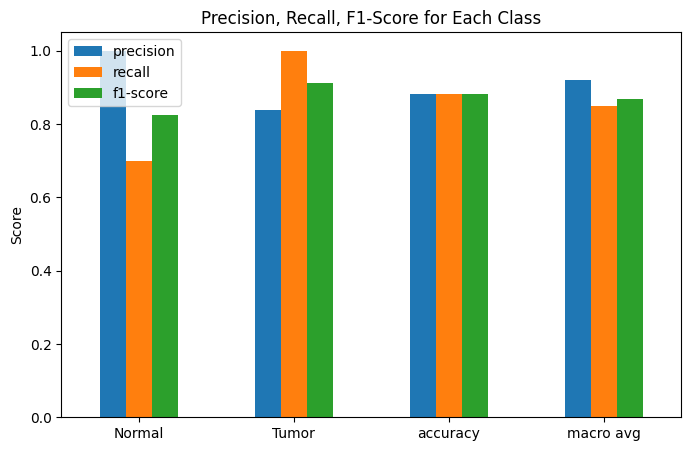

In [26]:
#Plotting Precision, Recall, F1-Score, and Support

import seaborn as sns
def plot_metrics(report):
    fig, ax = plt.subplots(figsize=(8, 5))
    metrics_df = pd.DataFrame(report).transpose()
    metrics_df.drop('support', axis=1).iloc[:-1].plot(kind='bar', ax=ax)
    ax.set_title('Precision, Recall, F1-Score for Each Class')
    ax.set_ylabel('Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

plot_metrics(report)

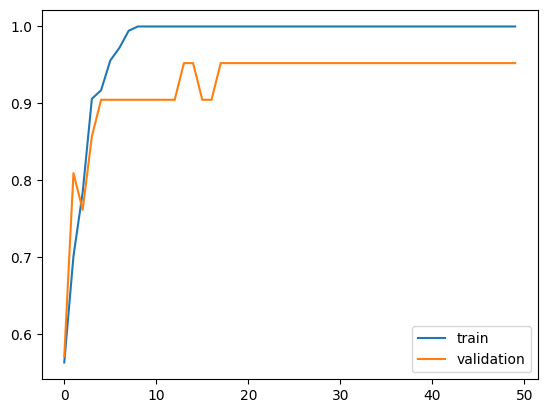

In [27]:
#ACCUARCY PLOT
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()
plt.show()

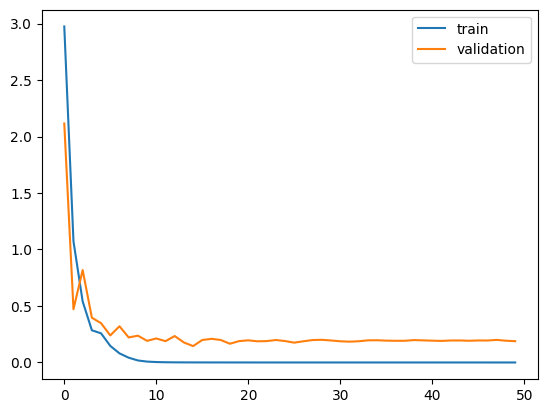

In [28]:
#LOSS PLOT 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.legend()
plt.show()

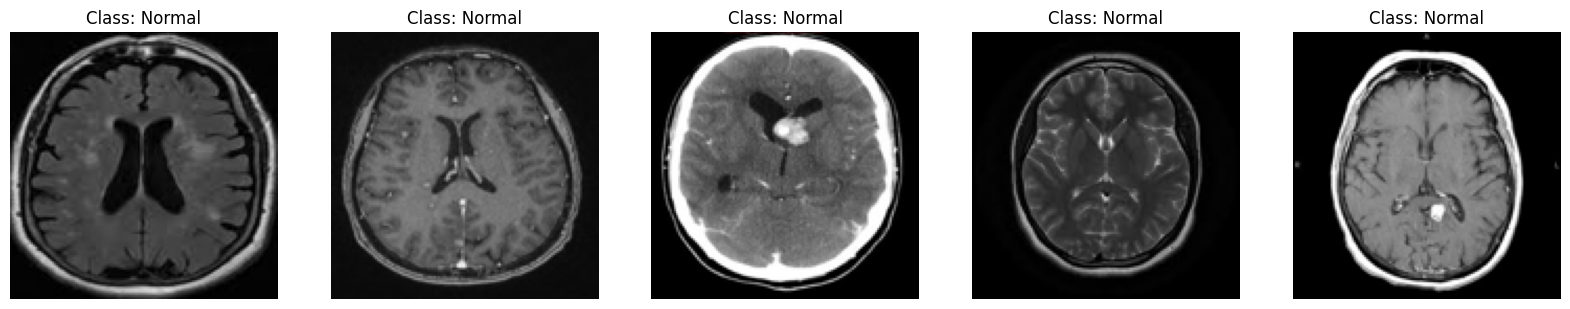

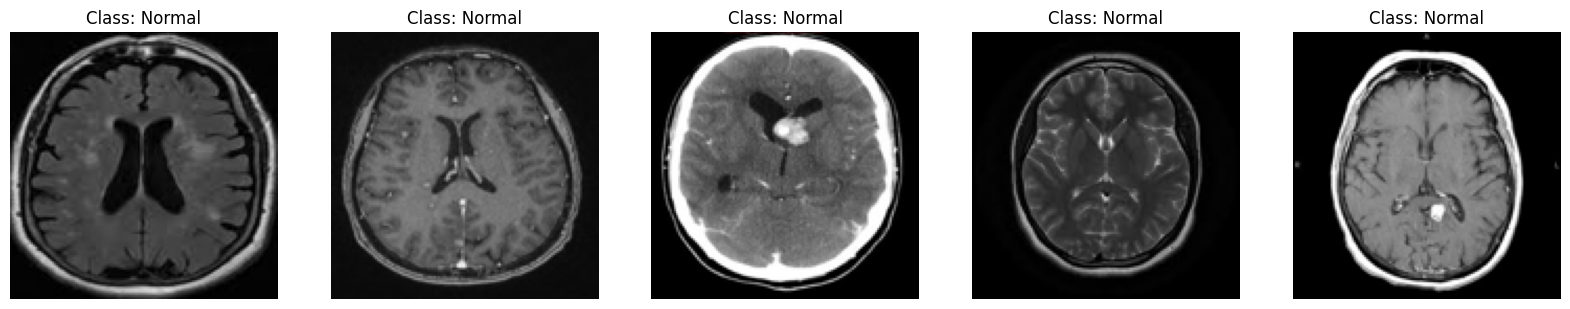

In [29]:
#Display some example images
class_names = ['Normal', 'Tumor']  # Define class names corresponding to labels 0 and 1

def plot_images(images, labels, class_names, enhanced=False):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray' if not enhanced else 'hot')
        ax.title.set_text(f'Class: {class_names[labels[i]]}')
        ax.axis('off')
    plt.show()

# Display original and enhanced images using the correct variable names and color mapping
plot_images(X[:5], Y[:5], class_names)  # Use 'X' for images and 'Y' for labels
plot_images(X[:5], Y[:5], class_names, enhanced=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.84      1.00      0.91        31

    accuracy                           0.88        51
   macro avg       0.92      0.85      0.87        51
weighted avg       0.90      0.88      0.88        51



<Axes: >

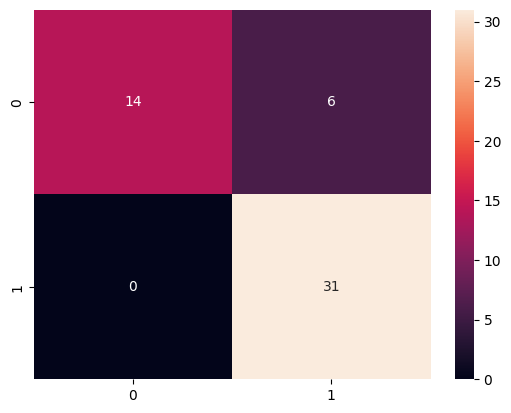

In [30]:
#conf_matrix

from sklearn.metrics import classification_report, confusion_matrix
# Calculate and display these metrics
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(Y_test, predicted_classes))
conf_matrix = confusion_matrix(Y_test, predicted_classes)
sn.heatmap(conf_matrix, annot=True, fmt='d')

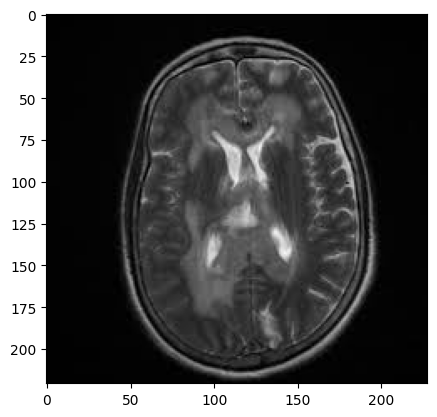

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Prediction Probabilities are:  [[9.8573744e-01 8.4286113e-04]]
Normal Cell


In [31]:
# Prediction Function for normal cell 

input_image_path = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/36 no.jpg'  # Change this to the actual path of your image
input_image = cv2.imread(input_image_path)

# If the image path is incorrect or the image is not found, input_image will be None
if input_image is not None:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.show()

    # Ensure the shape matches the expected input shape of your model
    input_image_reshape = cv2.resize(input_image, (128, 128))

    # Normalize the pixel values
    image_normalized = input_image_reshape / 255

    # Reshape for model prediction
    img_reshape = np.reshape(image_normalized, (1, 128, 128, 3))

    # Make Predictions
    input_prediction = model.predict(img_reshape)

    # Display the prediction Probabilities
    print('Prediction Probabilities are: ', input_prediction)

    # Get the Predicted Label
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 1:
        print('Tumor Cell')
    else:
        print('Normal Cell')
else:
    print("Image not found. Please check the file path.")


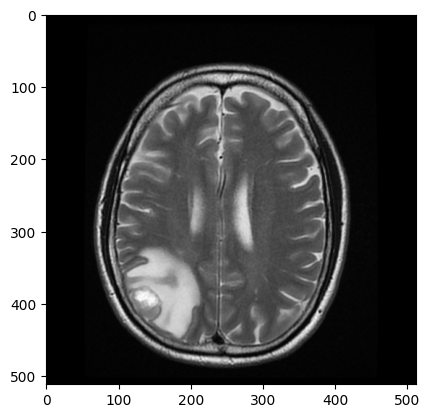

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction Probabilities are:  [[0.00408037 0.9977932 ]]
Tumor Cell


In [32]:
# Prediction Function for tumar cell 

input_image_path = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y107.jpg'  # Change this to the actual path of your image
input_image = cv2.imread(input_image_path)

# If the image path is incorrect or the image is not found, input_image will be None
if input_image is not None:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.show()

    # Ensure the shape matches the expected input shape of your model
    input_image_reshape = cv2.resize(input_image, (128, 128))

    # Normalize the pixel values
    image_normalized = input_image_reshape / 255

    # Reshape for model prediction
    img_reshape = np.reshape(image_normalized, (1, 128, 128, 3))

    # Make Predictions
    input_prediction = model.predict(img_reshape)

    # Display the prediction Probabilities
    print('Prediction Probabilities are: ', input_prediction)

    # Get the Predicted Label
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 1:
        print('Tumor Cell')
    else:
        print('Normal Cell')
else:
    print("Image not found. Please check the file path.")


In [33]:
model.save('/kaggle/working/tumor_detection.h5')